In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import pickle
import plotly.express as px

In [3]:
car_data=pd.read_csv('car_data.csv')
car_data

,index,Make,Model,Year,Trim,MSRP,Invoice Price,Used/New Price,Body Size,Body Style,Cylinders,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Highway Fuel Economy
0,0,Aston Martin,DBX707,2024,Base,"$242,000",NaN,"$242,000",Large,SUV,V8,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,20 mpg
1,1,Audi,A3,2024,Premium w/40 TFSI,"$35,800","$33,653","$35,800",Compact,Sedan,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg
2,2,Audi,A3,2024,Premium w/40 TFSI,"$37,800","$35,533","$37,800",Compact,Sedan,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,"$41,400","$38,917","$41,400",Compact,Sedan,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,"$39,400","$37,037","$39,400",Compact,Sedan,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,6410,Nissan,Z,2023,Performance,"$50,990",NaN,"$50,990",Compact,Coupe,V6,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,28 mpg
1606,6411,Nissan,Z,2023,Proto Spec,"$53,990",NaN,"$53,990",Compact,Coupe,V6,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,28 mpg
1607,6412,Nissan,Z,2023,Proto Spec,"$53,990",NaN,"$53,990",Compact,Coupe,V6,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,24 mpg
1608,6413,Nissan,Z,2023,Sport,"$40,990",NaN,"$40,990",Compact,Coupe,V6,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,24 mpg


In [4]:
for column in car_data:
    unique_vals = np.unique(car_data[column].fillna('0'))
    nr_values = len(unique_vals)
    if nr_values <= 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature index :1610
The number of values for feature Make :7 -- ['Aston Martin' 'Audi' 'BMW' 'Bentley' 'Ford' 'Mercedes-Benz' 'Nissan']
The number of values for feature Model :150
The number of values for feature Year :2 -- [2023 2024]
The number of values for feature Trim :373
The number of values for feature MSRP :1317
The number of values for feature Invoice Price :944
The number of values for feature Used/New Price :1317
The number of values for feature Body Size :3 -- ['Compact' 'Large' 'Midsize']
The number of values for feature Body Style :12 -- ['Cargo Minivan' 'Cargo Van' 'Convertible' 'Convertible SUV' 'Coupe'
 'Hatchback' 'Passenger Minivan' 'Passenger Van' 'Pickup Truck' 'SUV'
 'Sedan' 'Wagon']
The number of values for feature Cylinders :10 -- ['0' 'I3' 'I4' 'I5' 'I6' 'V10' 'V12' 'V6' 'V8' 'W12']
The number of values for feature Engine Aspiration :6 -- ['Electric Motor' 'Naturally Aspirated' 'Supercharged' 'Turbocharged'
 'Twin-Turbo' 'Twincharged']

In [5]:
car_data.isnull().sum()

index                     0
Make                      0
Model                     0
Year                      0
Trim                      0
MSRP                      0
Invoice Price           552
Used/New Price            0
Body Size                 0
Body Style                0
Cylinders               165
Engine Aspiration         0
Drivetrain                0
Transmission              0
Horsepower                5
Torque                   27
Highway Fuel Economy    424
dtype: int64

In [6]:
car_data.drop(['Invoice Price', 'Cylinders','Highway Fuel Economy'], axis=1,inplace=True)
car_data

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque
0,0,Aston Martin,DBX707,2024,Base,"$242,000","$242,000",Large,SUV,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm
1,1,Audi,A3,2024,Premium w/40 TFSI,"$35,800","$35,800",Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm
2,2,Audi,A3,2024,Premium w/40 TFSI,"$37,800","$37,800",Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,"$41,400","$41,400",Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,"$39,400","$39,400",Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,6410,Nissan,Z,2023,Performance,"$50,990","$50,990",Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm
1606,6411,Nissan,Z,2023,Proto Spec,"$53,990","$53,990",Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm
1607,6412,Nissan,Z,2023,Proto Spec,"$53,990","$53,990",Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm
1608,6413,Nissan,Z,2023,Sport,"$40,990","$40,990",Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm


In [7]:
car_data.isnull().sum()

index                 0
Make                  0
Model                 0
Year                  0
Trim                  0
MSRP                  0
Used/New Price        0
Body Size             0
Body Style            0
Engine Aspiration     0
Drivetrain            0
Transmission          0
Horsepower            5
Torque               27
dtype: int64

In [8]:
car_data['Horsepower_No'] = car_data['Horsepower'].str[0:3].astype(float)
display (car_data)

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Horsepower_No
0,0,Aston Martin,DBX707,2024,Base,"$242,000","$242,000",Large,SUV,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,697.0
1,1,Audi,A3,2024,Premium w/40 TFSI,"$35,800","$35,800",Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0
2,2,Audi,A3,2024,Premium w/40 TFSI,"$37,800","$37,800",Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,"$41,400","$41,400",Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,"$39,400","$39,400",Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,6410,Nissan,Z,2023,Performance,"$50,990","$50,990",Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0
1606,6411,Nissan,Z,2023,Proto Spec,"$53,990","$53,990",Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0
1607,6412,Nissan,Z,2023,Proto Spec,"$53,990","$53,990",Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0
1608,6413,Nissan,Z,2023,Sport,"$40,990","$40,990",Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0


In [9]:
car_data[car_data['Horsepower_No'].isna()]

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Horsepower_No
371,971,Ford,F-150 Lightning,2024,Flash,"$67,995","$67,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
372,972,Ford,F-150 Lightning,2024,Lariat,"$76,995","$76,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
373,973,Ford,F-150 Lightning,2024,Platinum,"$84,995","$84,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
374,974,Ford,F-150 Lightning,2024,Pro,"$54,995","$54,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
375,975,Ford,F-150 Lightning,2024,XLT,"$62,995","$62,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN


In [10]:
mean_horsepower = car_data['Horsepower_No'][car_data['Make'] == 'Ford'].mean()
mean_horsepower 

333.2254428341385

In [11]:
car_data['Horsepower_No'] = car_data['Horsepower_No'].fillna(mean_horsepower)
car_data['Horsepower'] = car_data['Horsepower'].fillna(mean_horsepower)
display (car_data[car_data['Horsepower_No'].isna()])

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Horsepower_No


In [12]:
car_data['Torque_No'] = car_data['Torque'].str[0:3].astype(float)
print (car_data['Torque_No'])

0       663.0
1       221.0
2       221.0
3       221.0
4       221.0
        ...  
1605    350.0
1606    350.0
1607    350.0
1608    350.0
1609    350.0
Name: Torque_No, Length: 1610, dtype: float64


In [13]:
display (car_data[car_data['Torque_No'].isna()])

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Horsepower_No,Torque_No
42,42,Audi,Q4 Sportback e-tron,2024,Premium w/55,"$58,200","$58,200",Midsize,SUV,Electric Motor,AWD,automatic,335 hp @ 0 rpm,NaN,335.000000,NaN
44,44,Audi,Q4 Sportback e-tron,2024,Premium Plus w/55,"$62,900","$62,900",Midsize,SUV,Electric Motor,AWD,automatic,335 hp @ 0 rpm,NaN,335.000000,NaN
46,46,Audi,Q4 Sportback e-tron,2024,Prestige w/55,"$65,200","$65,200",Midsize,SUV,Electric Motor,AWD,automatic,335 hp @ 0 rpm,NaN,335.000000,NaN
49,49,Audi,Q4 e-tron,2024,Premium w/55,"$55,200","$55,200",Midsize,SUV,Electric Motor,AWD,automatic,335 hp @ 0 rpm,NaN,335.000000,NaN
52,52,Audi,Q4 e-tron,2024,Premium Plus w/55,"$59,900","$59,900",Midsize,SUV,Electric Motor,AWD,automatic,335 hp @ 0 rpm,NaN,335.000000,NaN
54,54,Audi,Q4 e-tron,2024,Prestige w/55,"$62,200","$62,200",Midsize,SUV,Electric Motor,AWD,automatic,335 hp @ 0 rpm,NaN,335.000000,NaN
75,75,Audi,Q8 Sportback e-tron,2024,Premium Plus S line,"$82,200","$82,200",Midsize,SUV,Electric Motor,AWD,automatic,402 hp @ 0 rpm,NaN,402.000000,NaN
76,76,Audi,Q8 Sportback e-tron,2024,Premium S line,"$77,800","$77,800",Midsize,SUV,Electric Motor,AWD,automatic,402 hp @ 0 rpm,NaN,402.000000,NaN
77,77,Audi,Q8 Sportback e-tron,2024,Prestige S line,"$88,200","$88,200",Midsize,SUV,Electric Motor,AWD,automatic,402 hp @ 0 rpm,NaN,402.000000,NaN
78,78,Audi,Q8 e-tron,2024,Premium,"$74,400","$74,400",Midsize,SUV,Electric Motor,AWD,automatic,402 hp @ 0 rpm,NaN,402.000000,NaN


In [14]:
mean_torque = car_data['Torque_No'].mean()
mean_torque

364.9734680985471

In [15]:
car_data['Torque_No'] = car_data['Torque_No'].fillna(mean_torque)
car_data['Torque'] = car_data['Torque'].fillna(mean_torque)
print (car_data.isnull().sum())

index                0
Make                 0
Model                0
Year                 0
Trim                 0
MSRP                 0
Used/New Price       0
Body Size            0
Body Style           0
Engine Aspiration    0
Drivetrain           0
Transmission         0
Horsepower           0
Torque               0
Horsepower_No        0
Torque_No            0
dtype: int64


In [16]:
car_data.dtypes

index                  int64
Make                  object
Model                 object
Year                   int64
Trim                  object
MSRP                  object
Used/New Price        object
Body Size             object
Body Style            object
Engine Aspiration     object
Drivetrain            object
Transmission          object
Horsepower            object
Torque                object
Horsepower_No        float64
Torque_No            float64
dtype: object

In [17]:
car_data['MSRP'] = car_data['MSRP'].str.replace('$','')
car_data['MSRP'] = car_data['MSRP'].str.replace(',','').astype(float)
display (car_data)

/var/folders/3t/ts5k1c117ds44659sqc_xqnw0000gn/T/ipykernel_9778/947791087.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  car_data['MSRP'] = car_data['MSRP'].str.replace('$','')


,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Horsepower_No,Torque_No
0,0,Aston Martin,DBX707,2024,Base,242000.0,"$242,000",Large,SUV,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,697.0,663.0
1,1,Audi,A3,2024,Premium w/40 TFSI,35800.0,"$35,800",Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0,221.0
2,2,Audi,A3,2024,Premium w/40 TFSI,37800.0,"$37,800",Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0,221.0
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,41400.0,"$41,400",Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0,221.0
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,39400.0,"$39,400",Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0,221.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,6410,Nissan,Z,2023,Performance,50990.0,"$50,990",Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0
1606,6411,Nissan,Z,2023,Proto Spec,53990.0,"$53,990",Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0
1607,6412,Nissan,Z,2023,Proto Spec,53990.0,"$53,990",Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0
1608,6413,Nissan,Z,2023,Sport,40990.0,"$40,990",Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0


In [18]:
car_data['Used/New Price'] = car_data['Used/New Price'].str.replace('$','')
car_data['Used/New Price'] = car_data['Used/New Price'].str.replace(',','').astype(float)
car_data

/var/folders/3t/ts5k1c117ds44659sqc_xqnw0000gn/T/ipykernel_9778/3740355815.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  car_data['Used/New Price'] = car_data['Used/New Price'].str.replace('$','')


,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Horsepower_No,Torque_No
0,0,Aston Martin,DBX707,2024,Base,242000.0,242000.0,Large,SUV,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,697.0,663.0
1,1,Audi,A3,2024,Premium w/40 TFSI,35800.0,35800.0,Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0,221.0
2,2,Audi,A3,2024,Premium w/40 TFSI,37800.0,37800.0,Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0,221.0
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,41400.0,41400.0,Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0,221.0
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,39400.0,39400.0,Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0,221.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,6410,Nissan,Z,2023,Performance,50990.0,50990.0,Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0
1606,6411,Nissan,Z,2023,Proto Spec,53990.0,53990.0,Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0
1607,6412,Nissan,Z,2023,Proto Spec,53990.0,53990.0,Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0
1608,6413,Nissan,Z,2023,Sport,40990.0,40990.0,Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0


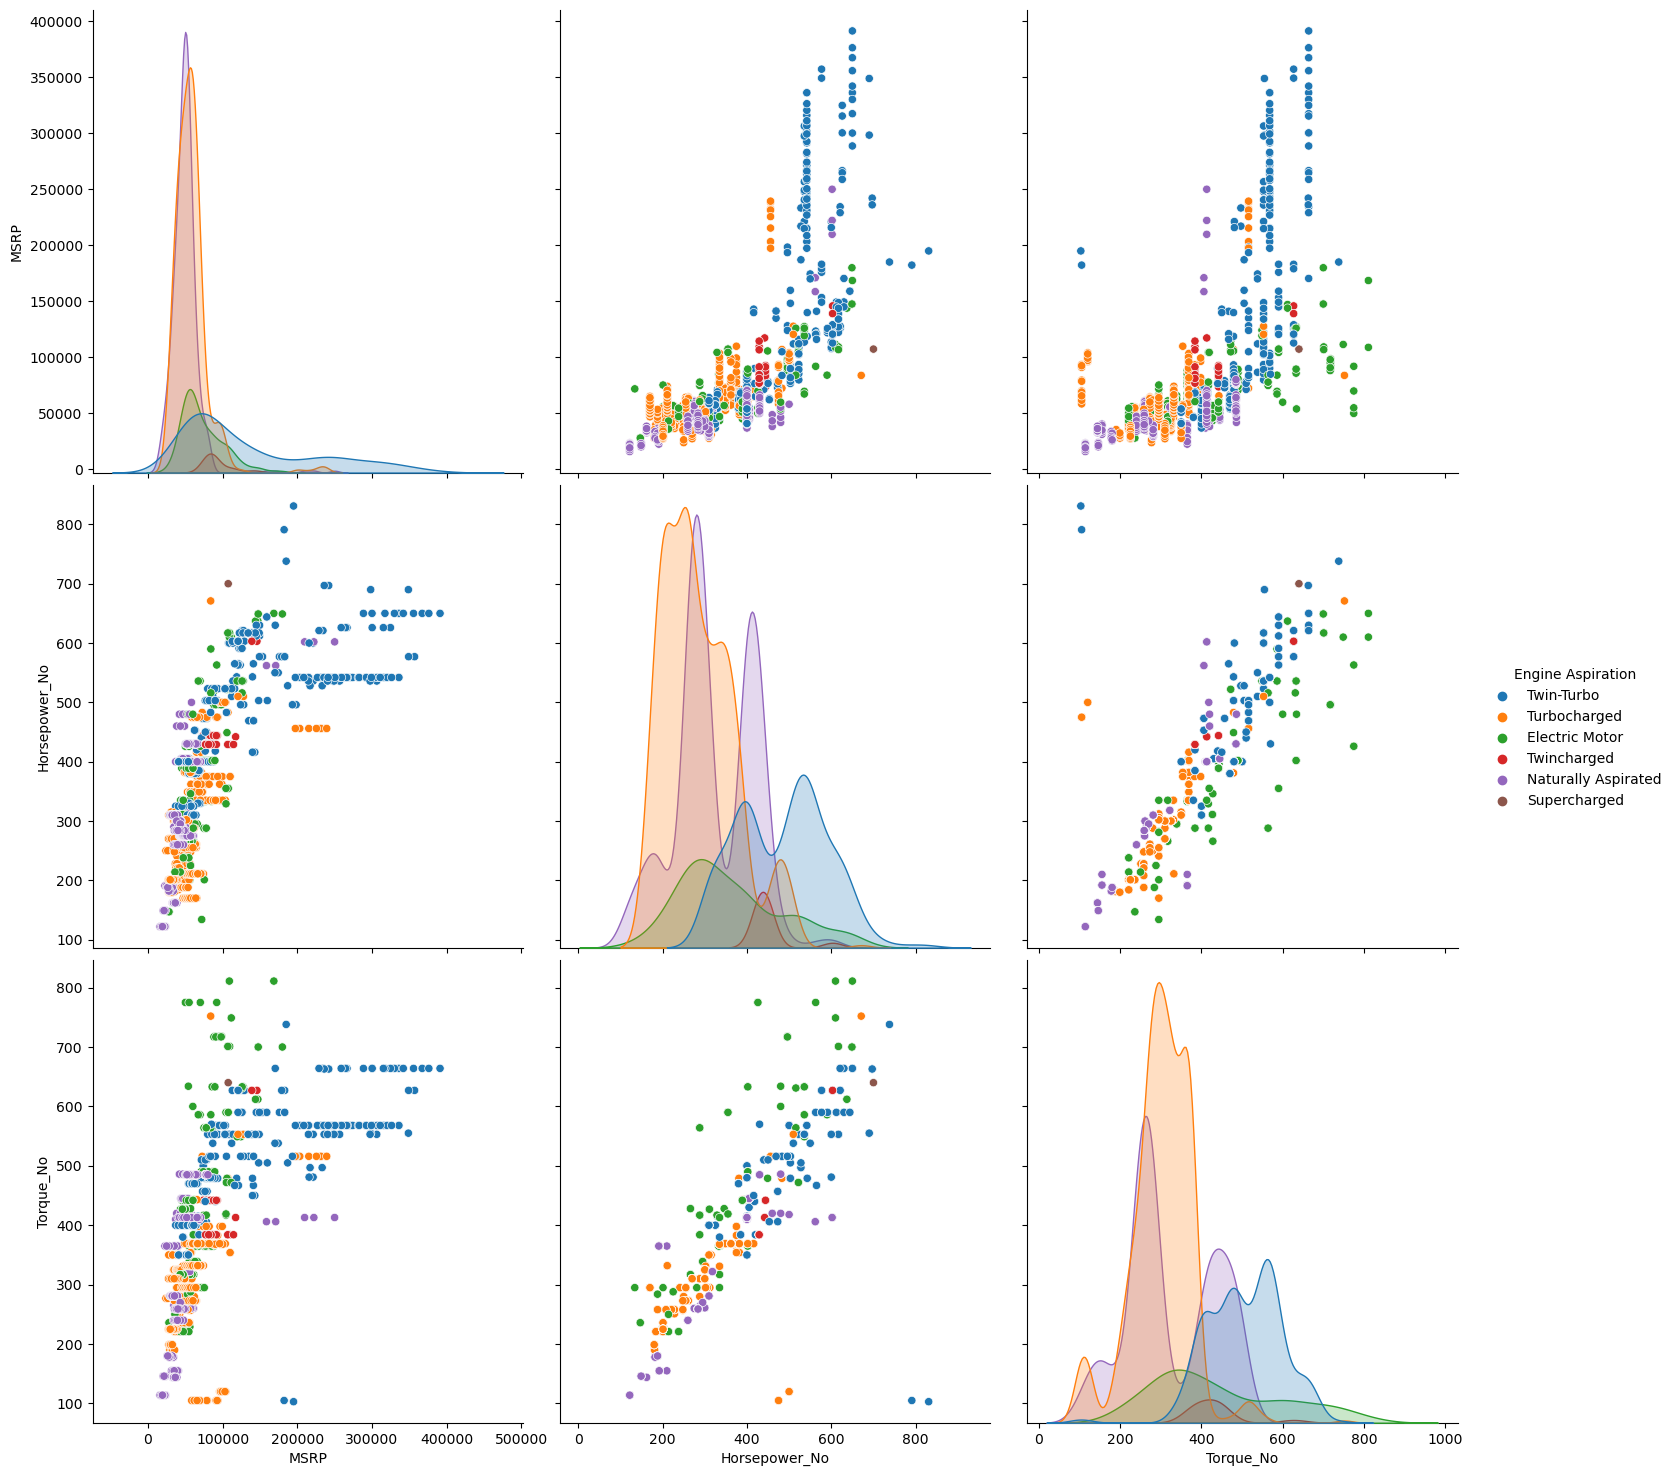

In [19]:
sns.pairplot(car_data[['MSRP', 'Horsepower_No', 'Torque_No', 'Engine Aspiration']], hue = 'Engine Aspiration', height = 5)
plt.show()

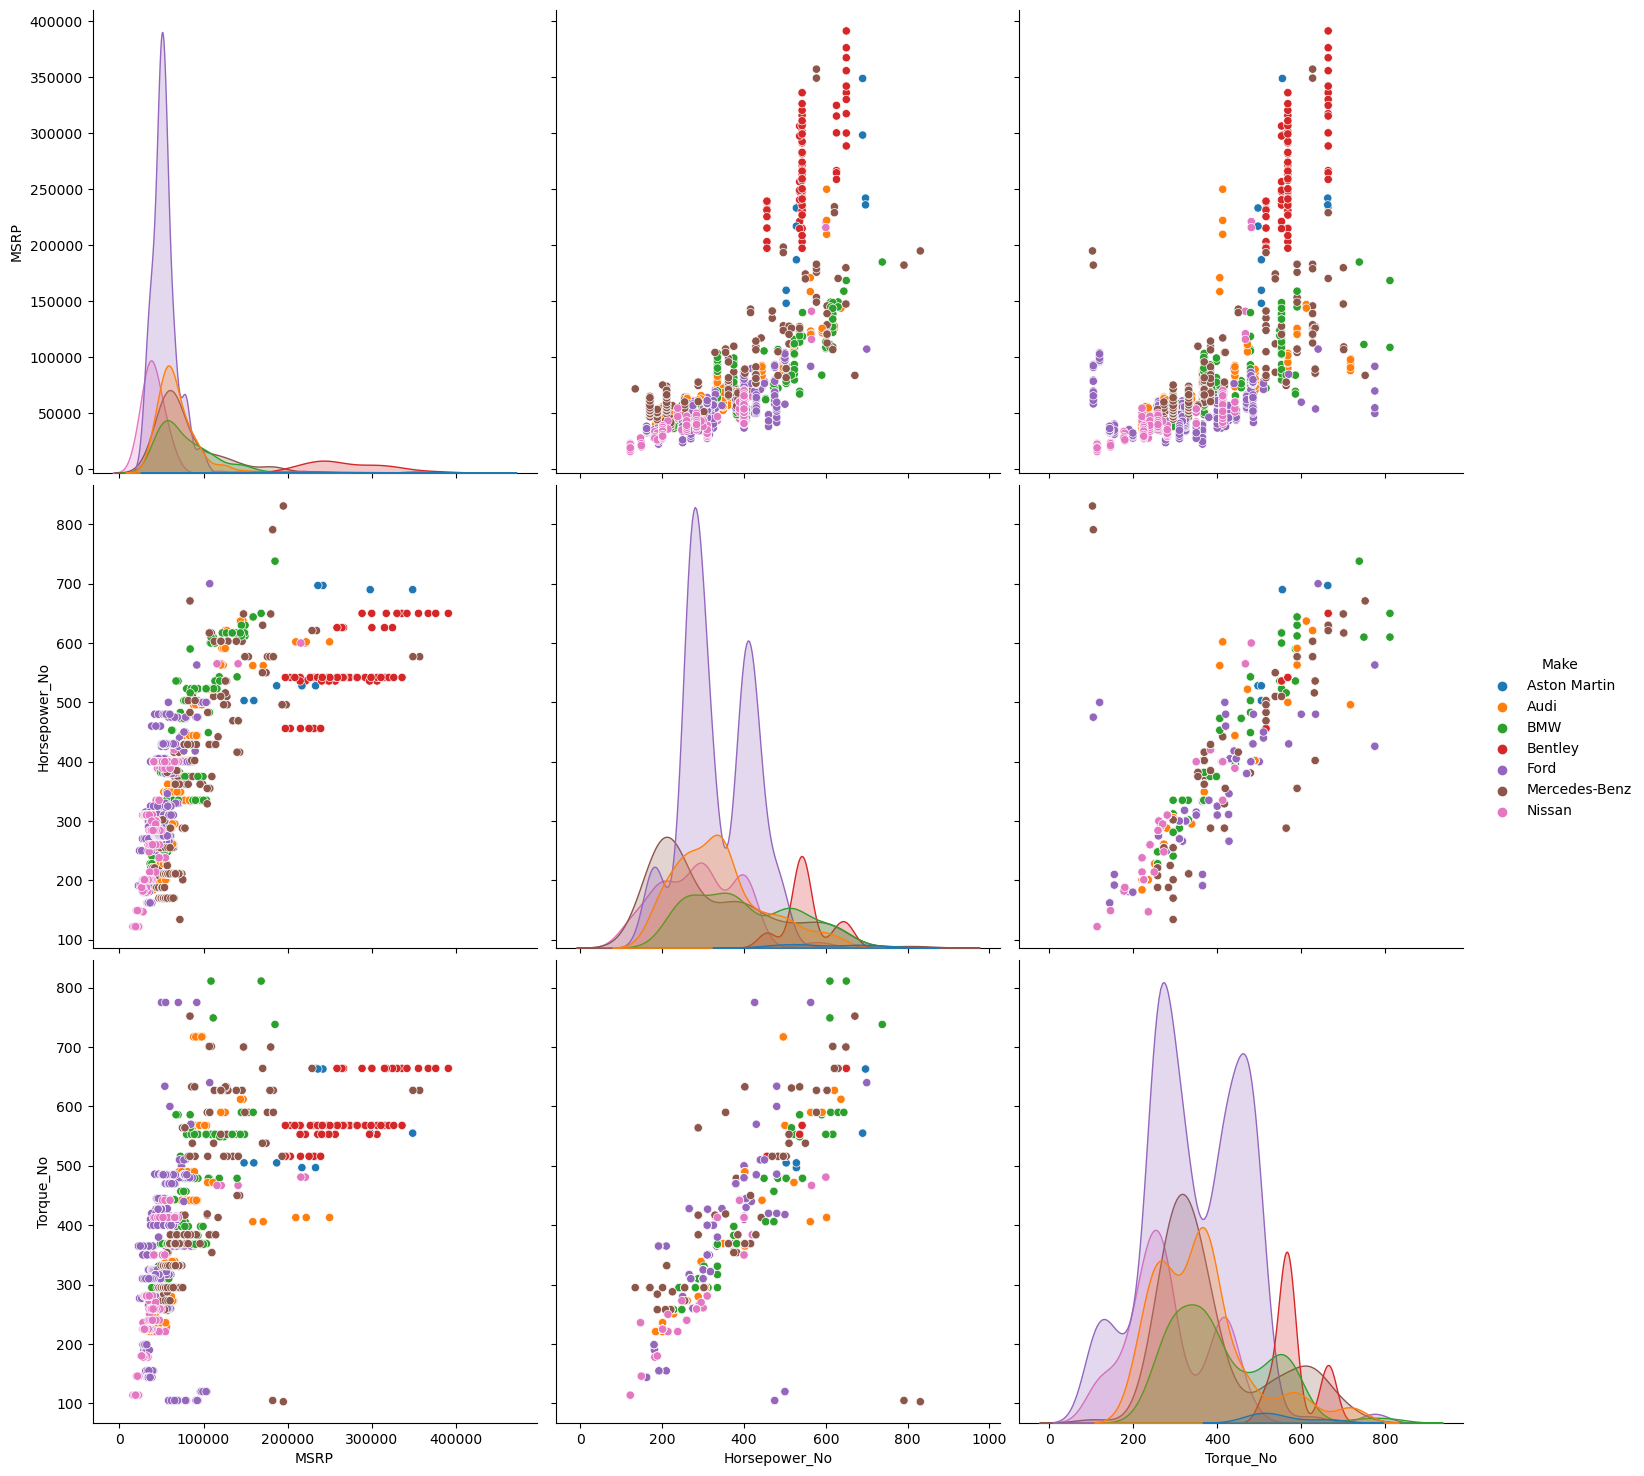

In [20]:
sns.pairplot(car_data[['MSRP', 'Horsepower_No', 'Torque_No', 'Make']], hue = 'Make', height = 5)
plt.show()

In [21]:
categories = ['Make','Body Size','Body Style', 'Engine Aspiration', 'Drivetrain','Transmission']

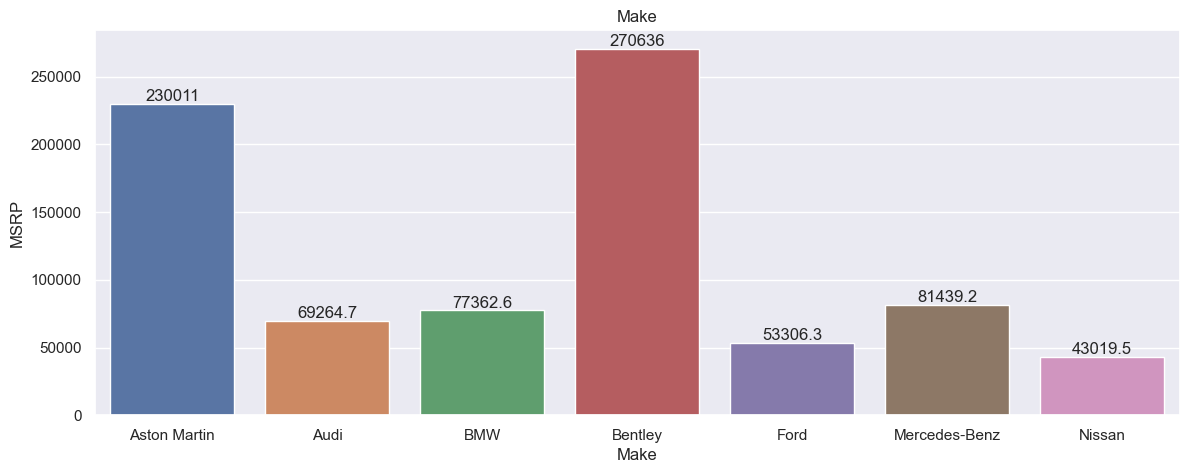

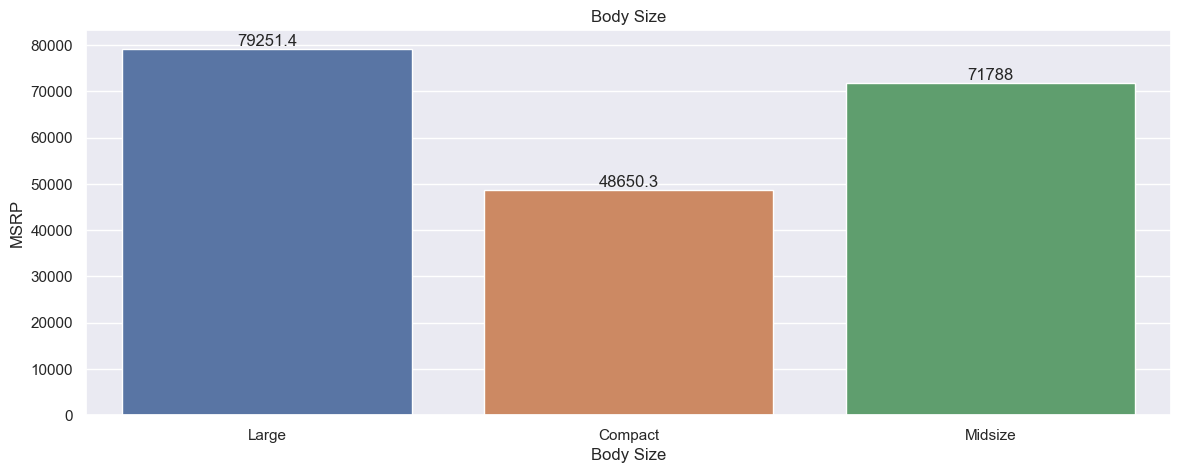

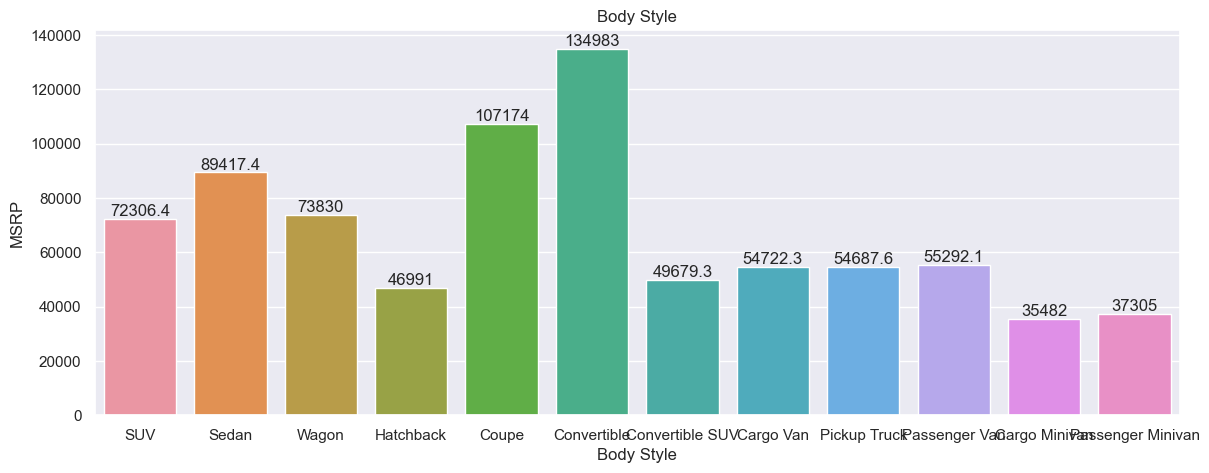

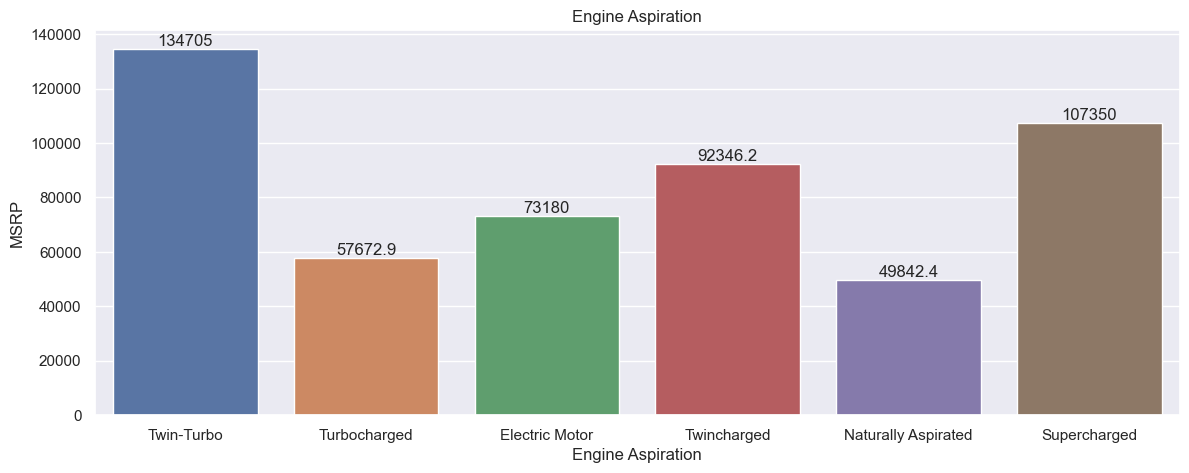

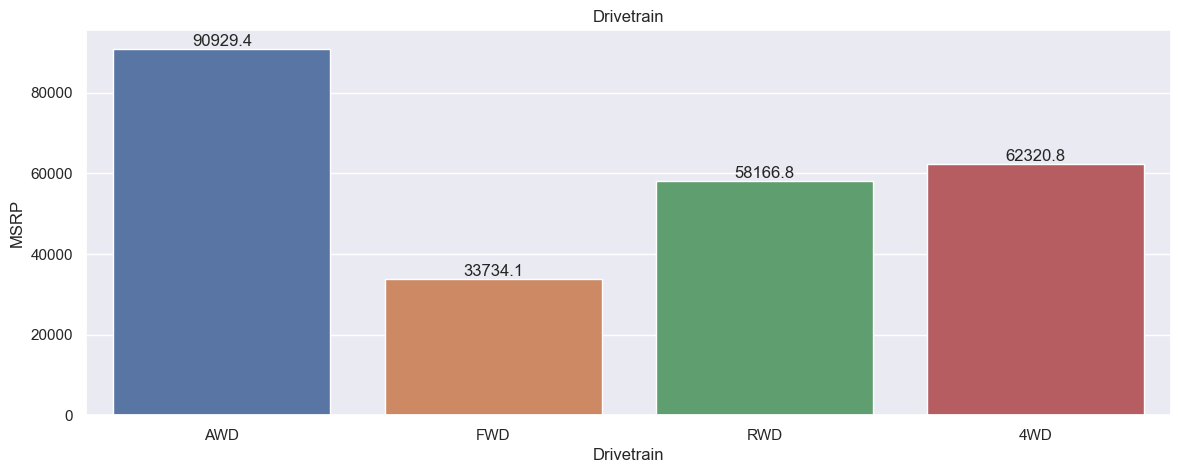

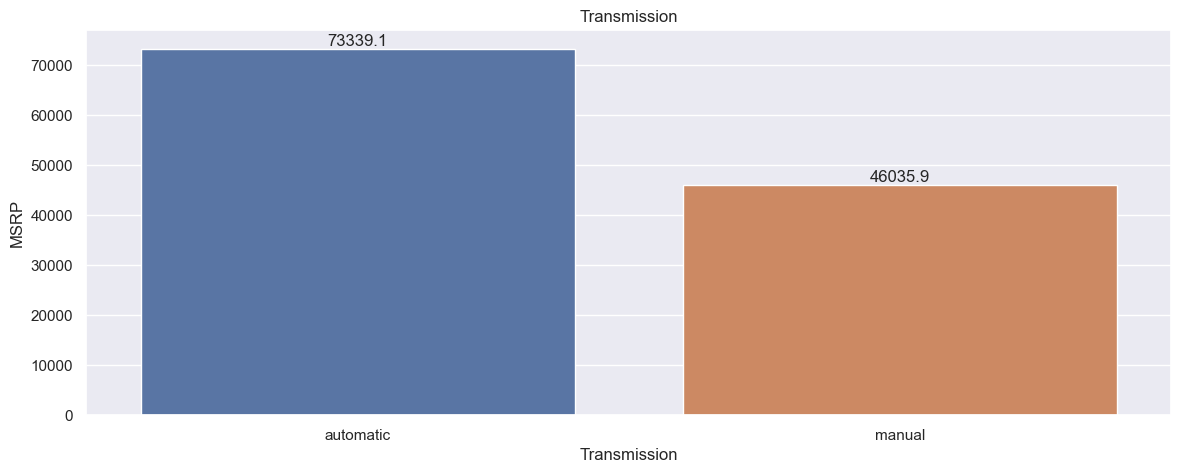

In [22]:
sns.set(rc={'figure.figsize':(14,5)})

for c in categories:    
    ax = sns.barplot(x=c, y="MSRP", data=car_data, errorbar=('ci', False)) 
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(c)
    plt.show()

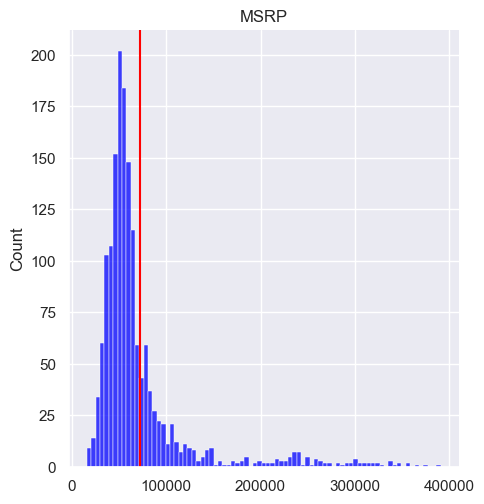

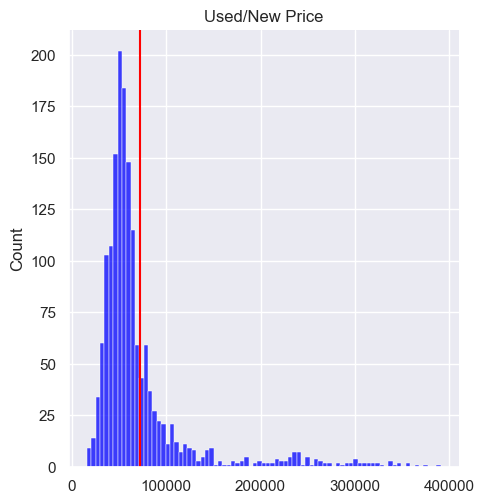

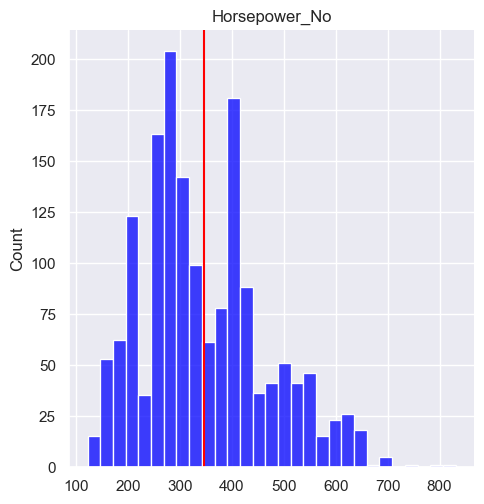

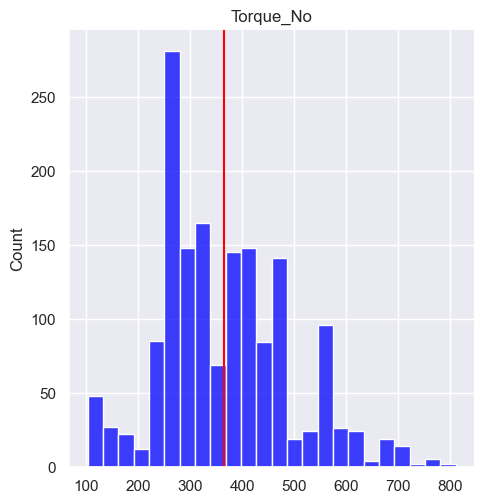

In [23]:
n_variables = ['MSRP','Used/New Price','Horsepower_No','Torque_No']
sns.set(rc={'figure.figsize':(10,5)})

for n in n_variables:
    x = car_data[n].values
    sns.displot(x, color = 'blue');
    mean = car_data[n].mean()
    plt.axvline(x= mean, ymin = 0,ymax=1, color = 'red')
    plt.title(n)
    plt.show()

The meadian of  MSRP :  55945.0


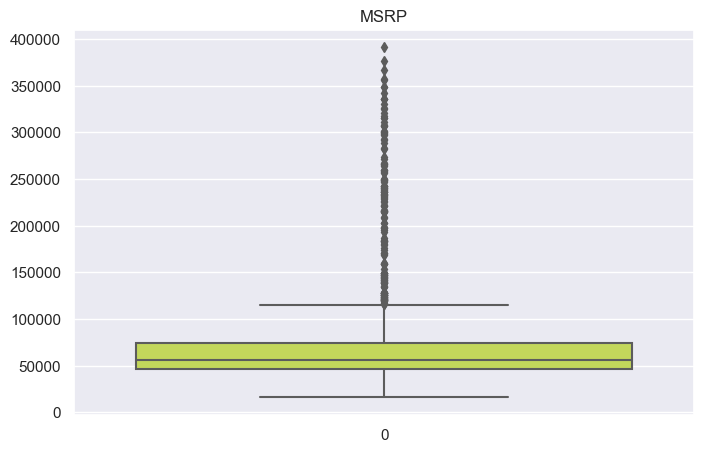

The meadian of  Used/New Price :  55945.0


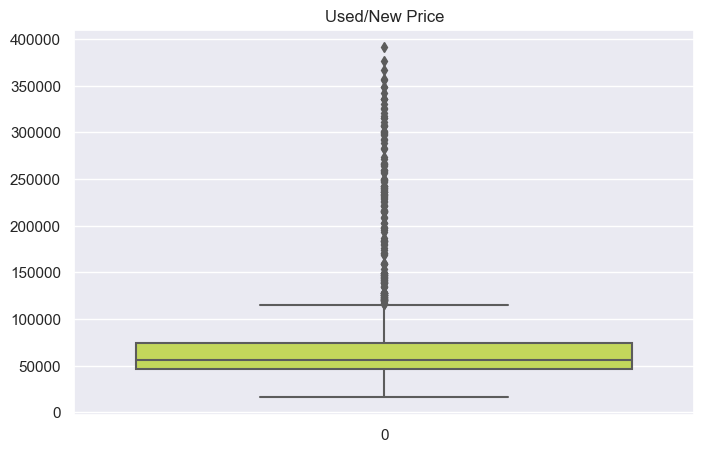

The meadian of  Horsepower_No :  325.0


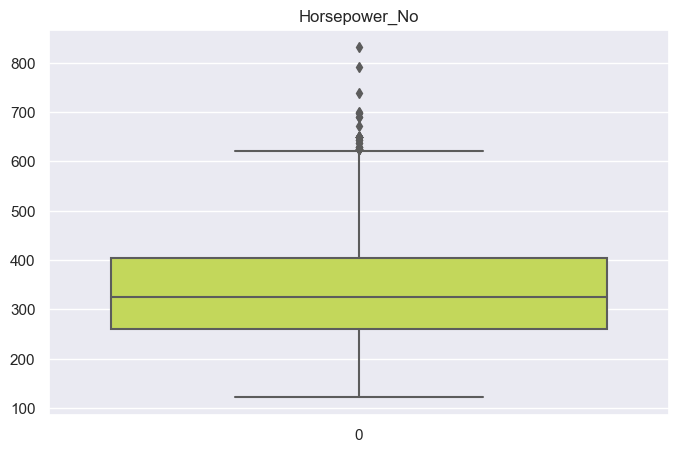

The meadian of  Torque_No :  350.0


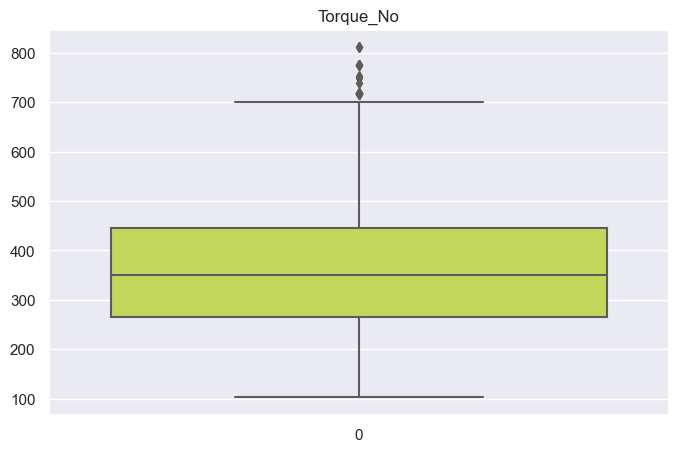

In [24]:
sns.set(rc={'figure.figsize':(8,5)})
for c in n_variables:    
    x = car_data[c].values
    ax = sns.boxplot(x, color = '#D1EC46')
    print('The meadian of ',c, ': ', car_data[c].median())
    plt.title(c)
    plt.show()

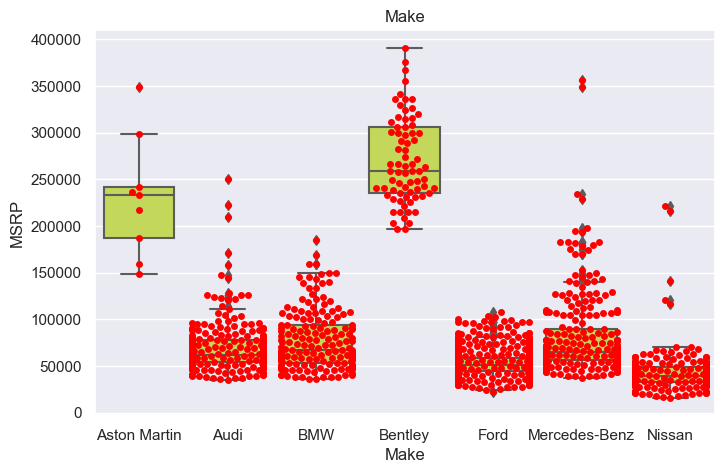

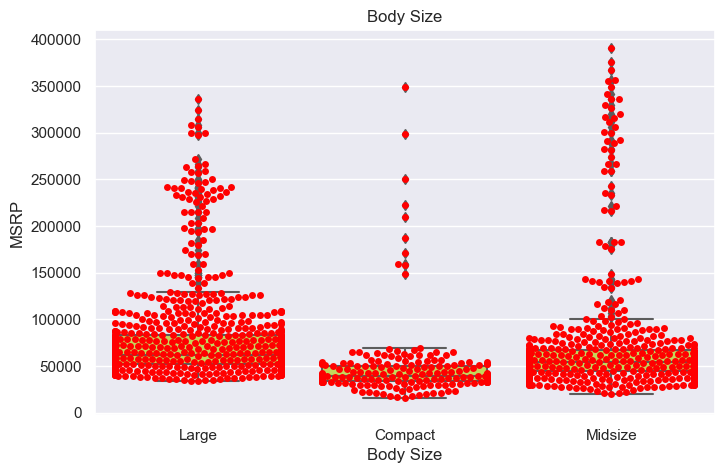

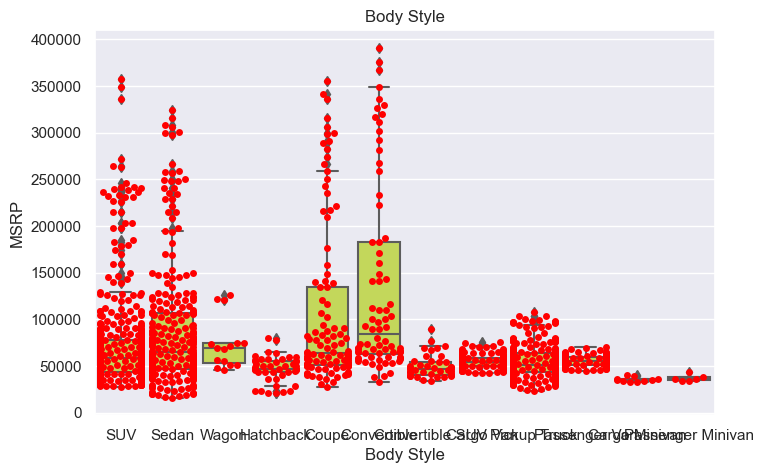

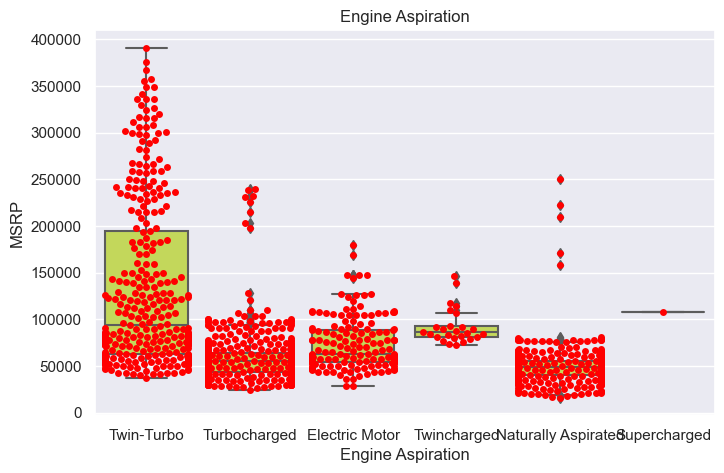

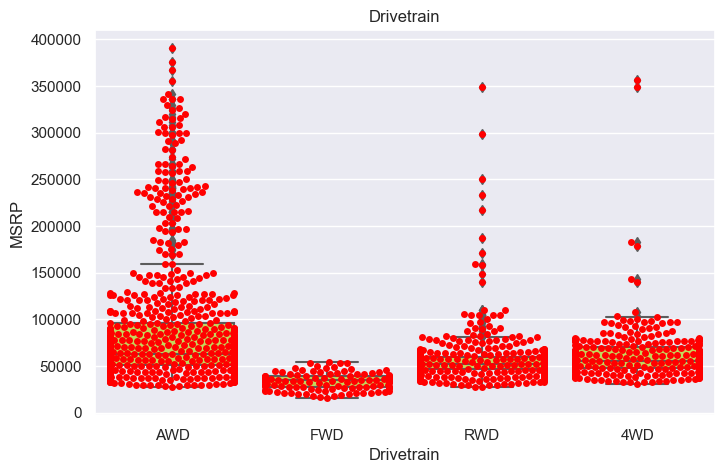

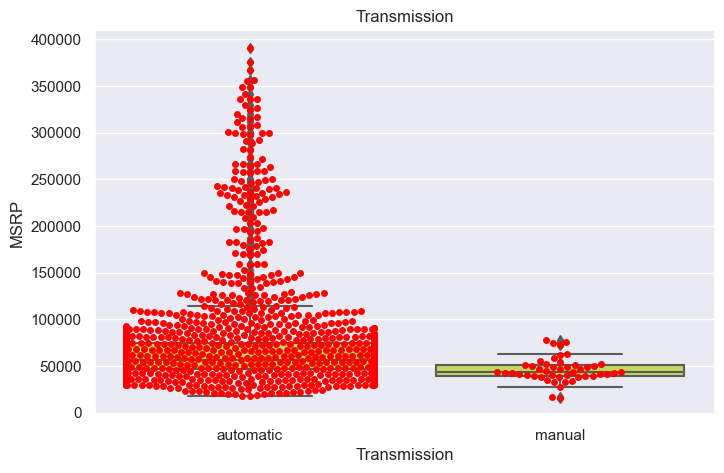

In [25]:
import warnings
warnings.filterwarnings("ignore")

categories = ['Make','Body Size','Body Style', 'Engine Aspiration', 'Drivetrain','Transmission']
sns.set(rc={'figure.figsize':(8,5)})

for c in categories:
    ax = sns.boxplot(x=c, y="MSRP", data=car_data, color = '#D1EC46')
    ax = sns.swarmplot(x=c, y="MSRP", data=car_data, color="red")
    plt.title(c)
    plt.show()

In [26]:
new_car_data = car_data.drop(['index', 'Model','Year', 'Trim', 'Used/New Price', 'Horsepower', 'Torque'], axis=1)
new_car_data

,Make,MSRP,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower_No,Torque_No
0,Aston Martin,242000.0,Large,SUV,Twin-Turbo,AWD,automatic,697.0,663.0
1,Audi,35800.0,Compact,Sedan,Turbocharged,FWD,automatic,201.0,221.0
2,Audi,37800.0,Compact,Sedan,Turbocharged,AWD,automatic,201.0,221.0
3,Audi,41400.0,Compact,Sedan,Turbocharged,AWD,automatic,201.0,221.0
4,Audi,39400.0,Compact,Sedan,Turbocharged,FWD,automatic,201.0,221.0
...,...,...,...,...,...,...,...,...,...
1605,Nissan,50990.0,Compact,Coupe,Twin-Turbo,RWD,automatic,400.0,350.0
1606,Nissan,53990.0,Compact,Coupe,Twin-Turbo,RWD,automatic,400.0,350.0
1607,Nissan,53990.0,Compact,Coupe,Twin-Turbo,RWD,manual,400.0,350.0
1608,Nissan,40990.0,Compact,Coupe,Twin-Turbo,RWD,manual,400.0,350.0


In [27]:
new_car_data = pd.get_dummies(new_car_data, columns = ['Make','Body Size','Body Style', 'Engine Aspiration','Drivetrain','Transmission'], dtype='int')

In [28]:
new_car_data.head()

,MSRP,Horsepower_No,Torque_No,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Ford,Make_Mercedes-Benz,Make_Nissan,...,Engine Aspiration_Supercharged,Engine Aspiration_Turbocharged,Engine Aspiration_Twin-Turbo,Engine Aspiration_Twincharged,Drivetrain_4WD,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD,Transmission_automatic,Transmission_manual
0,242000.0,697.0,663.0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,35800.0,201.0,221.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,37800.0,201.0,221.0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,41400.0,201.0,221.0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,39400.0,201.0,221.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [29]:
n_variables = ['MSRP','Horsepower_No','Torque_No']
pc = new_car_data[n_variables].corr(method ='pearson')
pc

,MSRP,Horsepower_No,Torque_No
MSRP,1.000000,0.703226,0.620070
Horsepower_No,0.703226,1.000000,0.785578
Torque_No,0.620070,0.785578,1.000000


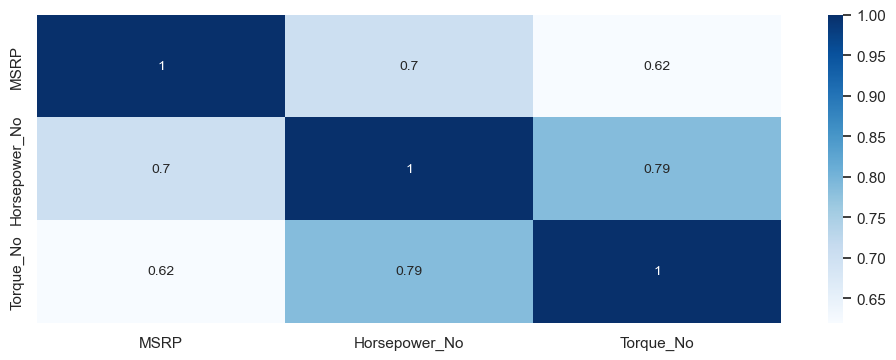

In [30]:
sns.set(rc={'figure.figsize':(12,4)})
cols = n_variables
ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Blues")

In [31]:
X = new_car_data.drop(['MSRP'], axis = 1).values
print(X.shape)

(1610, 36)


In [32]:
y = new_car_data['MSRP'].astype(int)
print(y.shape)

(1610,)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1288, 36)
(322, 36)
(1288,)
(322,)


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [35]:
lr=LinearRegression()
rd=Ridge(alpha=1.0)
ls=Lasso(alpha=0.001)
en=ElasticNet(alpha=0.001, l1_ratio=0.5)
dtr=DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=2)
rfr=RandomForestRegressor(n_estimators=300,max_depth=15,min_samples_split=5,min_samples_leaf=2,random_state=15)
gb=GradientBoostingRegressor(n_estimators=300,learning_rate=0.05,max_depth=3,random_state=15)
xg=XGBRegressor(n_estimators=500,learning_rate=0.05,max_depth=6,subsample=0.8,colsample_bytree=0.8,random_state=15)
sv=SVR(C=100, kernel='rbf', gamma='scale')
knn=KNeighborsRegressor(n_neighbors=5, weights='distance')


In [36]:
models = {
    'Linear' : lr,
    'Ridge' : rd, 
    'Lasso': ls, 
    'ElasticNet': en, 
    'DecisionTree': dtr, 
    'RandomForest': rfr, 
    'GradientBoost': gb, 
    'XGBoost': xg, 
    'SupportVector': sv,
    'KNN':knn
}

In [37]:
def train_regressor(reg,X_train,y_train,X_test,y_test):
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    r2s=r2_score(y_test,y_pred)
    mas=mean_absolute_error(y_test,y_pred)
    rmse=sqrt(mean_squared_error(y_test,y_pred))
    
    return r2s,mas,rmse

In [38]:
train_regressor(lr,X_train,y_train,X_test,y_test)

(0.9198625302493008, 11090.088349592681, 16534.594571973663)

In [39]:
r2score=[]
MeanAbsoluteError=[]
RootMeanSquaredError=[]

for name,reg in models.items():
    curr_r2s,curr_mas,curr_rmse=train_regressor(reg,X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("R2_score - ",curr_r2s)
    print("MeanAbsoluteError - ",curr_mas)
    print("RootMeanSquaredError - ",curr_rmse)
    
    r2score.append(curr_r2s)
    MeanAbsoluteError.append(curr_mas)
    RootMeanSquaredError.append(curr_rmse)

For  Linear
R2_score -  0.9198625302493008
MeanAbsoluteError -  11090.088349592681
RootMeanSquaredError -  16534.594571973663
For  Ridge
R2_score -  0.9185036850690964
MeanAbsoluteError -  11172.701642116708
RootMeanSquaredError -  16674.189128644048
For  Lasso
R2_score -  0.9198625154550661
MeanAbsoluteError -  11090.08782462994
RootMeanSquaredError -  16534.596098205147
For  ElasticNet
R2_score -  0.918999797910846
MeanAbsoluteError -  11142.812023398628
RootMeanSquaredError -  16623.35917821791
For  DecisionTree
R2_score -  0.9339522314087185
MeanAbsoluteError -  7649.3925694338095
RootMeanSquaredError -  15010.833657000061
For  RandomForest
R2_score -  0.9495942618816695
MeanAbsoluteError -  6666.495693614952
RootMeanSquaredError -  13113.412624761544
For  GradientBoost
R2_score -  0.9471612285952713
MeanAbsoluteError -  7224.864185463787
RootMeanSquaredError -  13426.168489076548
For  XGBoost
R2_score -  0.9525492503120796
MeanAbsoluteError -  5986.323733501553
RootMeanSquaredErro

In [40]:
performance_df = pd.DataFrame({'Algorithm':models.keys(),'R2_Score':r2score,'MeanAbsoluteError':MeanAbsoluteError,'RootMeanSquaredError':RootMeanSquaredError}).sort_values('R2_Score',ascending=False)

In [41]:
performance_df

,Algorithm,R2_Score,MeanAbsoluteError,RootMeanSquaredError
7,XGBoost,0.952549,5986.323734,12723.227030
5,RandomForest,0.949594,6666.495694,13113.412625
6,GradientBoost,0.947161,7224.864185,13426.168489
9,KNN,0.937965,6735.383155,14547.680514
4,DecisionTree,0.933952,7649.392569,15010.833657
0,Linear,0.919863,11090.088350,16534.594572
2,Lasso,0.919863,11090.087825,16534.596098
3,ElasticNet,0.919000,11142.812023,16623.359178
1,Ridge,0.918504,11172.701642,16674.189129
8,SupportVector,0.083916,27042.425212,55904.072621


In [42]:
pickle.dump(xg,open('XGBoost.pkl','wb'))

In [43]:
mod=pickle.load(open('XGBoost.pkl','rb'))
mod.predict (X_test)

array([ 59800.914,  54675.105,  78133.71 ,  58217.902,  50916.99 ,
        46588.156,  32093.756,  53455.504,  57228.883, 278936.06 ,
        39691.793,  48814.875,  51082.39 ,  50455.324,  48860.52 ,
        77343.86 ,  47381.344,  47079.46 ,  63026.89 ,  56578.594,
        57538.297,  55837.137,  54843.44 ,  34877.246,  34081.06 ,
        51306.336,  62629.62 ,  34877.246,  51123.348, 211404.25 ,
        32321.389,  44875.438,  56578.594,  32093.756,  52972.082,
        58177.14 ,  73020.625,  54843.44 ,  48308.625,  53455.504,
        35090.652,  40700.2  ,  58355.17 ,  52904.348,  98266.61 ,
        42848.34 ,  60534.316,  37228.906,  64809.363,  61479.484,
        32321.389,  40506.293,  52064.113,  51082.39 ,  48860.52 ,
        50323.473,  54675.105,  35090.652,  54843.44 ,  64809.363,
        36119.117,  40506.293,  80922.484, 228209.81 ,  36691.12 ,
        61479.484,  47575.492,  35413.54 ,  54496.727,  80811.3  ,
        52912.38 ,  79236.57 , 143536.36 ,  48357.984,  38633.

In [44]:
all_df_predict = xg.predict(X)
all_df_predict

array([238666.72 ,  36930.035,  40506.293, ...,  47575.492,  47575.492,
        47031.426], dtype=float32)

In [45]:
car_data['MSRP Predictions'] = all_df_predict
car_data.to_excel("data_with_pred.xlsx")
display (car_data)

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Horsepower_No,Torque_No,MSRP Predictions
0,0,Aston Martin,DBX707,2024,Base,242000.0,242000.0,Large,SUV,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,697.0,663.0,238666.718750
1,1,Audi,A3,2024,Premium w/40 TFSI,35800.0,35800.0,Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0,221.0,36930.035156
2,2,Audi,A3,2024,Premium w/40 TFSI,37800.0,37800.0,Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0,221.0,40506.292969
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,41400.0,41400.0,Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0,221.0,40506.292969
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,39400.0,39400.0,Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0,221.0,36930.035156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,6410,Nissan,Z,2023,Performance,50990.0,50990.0,Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0,47031.425781
1606,6411,Nissan,Z,2023,Proto Spec,53990.0,53990.0,Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0,47031.425781
1607,6412,Nissan,Z,2023,Proto Spec,53990.0,53990.0,Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0,47575.492188
1608,6413,Nissan,Z,2023,Sport,40990.0,40990.0,Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0,47575.492188
